# Predictive Modeling: the importance of data in decision making for NPOs.

## Introduction
Non-Profit Organizations (NPOs) play a vital role in social, educational, and economic development, but some, especially in underdeveloped countries like Haiti, rely heavily on gut instinct and traditional methods to make decisions, which leads to poor donor retention, ineffective communication, weak donor interaction, and unsuccessful campaigns.
Since NPOs rely heavily on fundraising, understanding donor behavior is a must, as one of the major challenges NPOs face is maintaining donor engagement and loyalty over time.

The primary objective of this project is to showcase the importance of using data to make informed decisions in NPOs.
For that purpose, the project aims to analyze donor behavior and categorize donors for a random and fictitious organization. The insights gained throughout this analysis will foster the use of data and machine learning in decision-making, which can therefore help NPOs design more effective fundraising and communication strategies, ultimately enhancing their ability to sustain and grow their initiatives.

To achieve this, we use the  [Donor Data](https://www.kaggle.com/datasets/maheshpandey87/donor-data/data) from Kaggle, which comprises six tables detailing donors, donations, campaigns, project results, and engagement activities. These data provide a comprehensive view of donor interactions and contributions, forming the basis for our analysis.

 ## Methodology
 #### **Exploratory data Analysis**
 - data preparation
 - business understanding
 - data understanding
 #### **Major questions**
These questions deepen our grasp of the business and data context, steering the analysis toward the NPOs' core concerns and enabling a thorough exploration of donor dynamics.

This part is crucial, as it serves as a compass that guides our analysis and helps address stakeholders' concerns or uncover relevant information.

#### **Modeling**
""'''''
#### **Model Evaluation**
#### **Recommendations**
#### **Contact information**
the contact information of the two data scientist who work on this project is provided.

NB: The scientist colaborated equally on this project.
- name
- email
- phone number
- LinkedIn


## EDA – Exploratory Data Analysis

### Data preparation

**Libraries and files importation**

In [110]:
# libraries importation
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# files importation
donors= pd.read_csv('donors.csv')
campaigns= pd.read_csv('campaigns.csv')
donations= pd.read_csv('donations_linked.csv')
engagement_history= pd.read_csv('engagement_history.csv')
engagement_outcomes =pd.read_csv('engagement_outcomes.csv')
impact= pd.read_csv('impact.csv')

In [111]:
print(f"Number of Donors" ,donors.shape[0] ,"\nNumber donations", donations.shape[0],
     "\nNumber of Campaigns", campaigns.shape[0], "\nEngagement_history",engagement_history.shape[0],"\nImpact",impact.shape[0])

Number of Donors 4891 
Number donations 17840 
Number of Campaigns 10 
Engagement_history 24238 
Impact 50


**Merging all Tables**

In [112]:
Donors_donations= pd.merge(donors,donations , on='DonorID', how='left')
Donors_donations_Campaigns= pd.merge(Donors_donations, campaigns, on='CampaignID', how='left')
Donors_donations_Campaigns_engagement_history =pd.merge(Donors_donations_Campaigns, engagement_history, on='DonorID',  how='left')
Donors_donations_Campaigns_engagement_history_impacts =pd.merge(Donors_donations_Campaigns_engagement_history,impact, on ='CampaignID', how='left')

Comment: there are 7 tables in the dataset, we merge 6 of them because donors.csv and donations.csv are the same tables.

In [113]:
# all tables are merged into one
df= Donors_donations_Campaigns_engagement_history_impacts


In [114]:
# the merged tables
df.head()


,DonorID,Age,Gender,Location,JoinDate,DonationID,DonationDate,Amount,CampaignID,CampaignName,StartDate,EndDate,TargetAmount,ActualAmount,Channel,Date,EngagementOutcome,ImpactType,Value,Cost
0,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,59:27.6,59:27.6,54063.32,62346.29,Social Media,27/12/2022,Not Reached,Workshops Delivered,31.0,100.0
1,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,59:27.6,59:27.6,54063.32,62346.29,Social Media,27/12/2022,Not Reached,Youth Reached,851.0,25.0
2,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,59:27.6,59:27.6,54063.32,62346.29,Social Media,27/12/2022,Not Reached,Volunteers Engaged,450.0,25.0
3,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,59:27.6,59:27.6,54063.32,62346.29,Social Media,27/12/2022,Not Reached,Training Sessions,100.0,75.0
4,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,59:27.6,59:27.6,54063.32,62346.29,Social Media,27/12/2022,Not Reached,Mentorship Hours,406.0,35.0


In [115]:
print( 'Number of Records',df.shape[0])

Number of Records 440083


**Check for null or missing values**

In [116]:
df.isnull().sum().sort_values(ascending=False)

,0
CampaignID,638
Amount,638
DonationDate,638
DonationID,638
Cost,638
ActualAmount,638
Value,638
ImpactType,638
StartDate,638
CampaignName,638


In [117]:
# drop rows with null values
df[df.isnull().any(axis=1)]
df = df.dropna(subset=['DonationID'])

**Dealing with Duplicates values**

In [118]:
# drop rows with duplicates
duplicates = df[df.duplicated()]
print("Number of duplicate rows before dropping:", duplicates.shape[0])
df = df.drop_duplicates()
print("Number of duplicate rows after dropping:", df.duplicated().sum())
# Dropping rows duplicate donation ID
df = df.drop_duplicates(subset=['DonationID'])

Number of duplicate rows before dropping: 205
Number of duplicate rows after dropping: 0


Comment: Dropping duplicated DonationID rows is a must since we don't want to consider the same donation many time, which would biased our analysis.

In [119]:
# to verify if all null values were dropped run the code in this cell:
# df.isnull().sum().sort_values()

**Fix the dates Format**

In [120]:
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['DonationDate'] = pd.to_datetime(df['DonationDate'], dayfirst=True)

/tmp/ipython-input-667823751.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['DonationDate'] = pd.to_datetime(df['DonationDate'], dayfirst=True)


**Remove unneccesary columns**

In [121]:
df = df.drop(['StartDate', 'EndDate'], axis=1)

**Table's shape**

In [122]:
# Run the code in this cell to see table's shape after cleaning
# df.shape

In [123]:
# after cleaning we save the  merged dataset
df.to_csv('Data.csv',index=0)

**Explore basic statistics for numerical features (mean, median, min, max)**

In [124]:
df.describe().round(2)

,Age,JoinDate,DonationDate,Amount,TargetAmount,ActualAmount,Date,Value,Cost
count,17840.00,17840,17840,17840.00,17840.00,17840.00,17840,17840.00,17840.0
mean,48.44,2019-10-26 01:02:47.732196864,2020-02-09 03:17:45.470851840,110.24,62092.24,59866.38,2023-02-25 02:59:26.098654720,33.52,100.0
min,18.00,2015-04-23 22:59:27.552825,2015-01-01 00:00:00,10.00,33193.34,33179.39,2022-07-25 00:00:00,19.00,100.0
25%,33.00,2017-08-20 22:59:27.552825088,2017-07-07 00:00:00,38.90,49248.12,44689.69,2022-09-22 00:00:00,24.00,100.0
50%,48.00,2019-10-27 22:59:27.552825088,2020-02-11 00:00:00,79.15,58107.99,57113.83,2022-12-12 00:00:00,25.00,100.0
75%,64.00,2022-01-08 22:59:27.552825088,2022-09-11 00:00:00,147.52,69723.66,68170.79,2023-05-22 00:00:00,37.00,100.0
max,79.00,2024-04-18 22:59:27.552825,2025-04-18 00:00:00,930.72,98304.41,102566.77,2025-04-17 00:00:00,85.00,100.0
std,17.85,NaN,NaN,100.75,21218.57,19216.03,NaN,18.27,0.0


### Business understanding

In today’s fast-evolving fundraising landscape, nonprofit organisations face growing pressure to engage supporters meaningfully, demonstrate results, and build trust through transparency. Traditional, instinct-driven approaches no longer meet modern donor expectations

Adopting a data-informed approach is not just a technical upgrade—it’s a cultural shift that aligns mission, message, and measurement. With the right mindset and existing tools, even small organisations can use data to boost engagement and impact.

Delivering measurable change increasingly depends on how well nonprofits engage and retain supporters. As donor expectations rise and attention spans shrink, sustaining long-term relationships becomes a major challenge.[McKinsey Global Institute](https://www.mckinsey.com/capabilities/growth-marketing-and-sales/our-insights/five-facts-how-customer-analytics-boosts-corporate-performance) says that data-driven organisations are 23 times more likely to acquire customers, 6 times as likely to retain customers and 19 times as likely to be profitable, showing the importance of including data in decision making.

Our objectives focus on helping NPOs reduce donor churn, strengthen their  relationships with donors, and improve alignment between fundraising and impact, with data driven analysis. We aim to help them engage donors and inspire new strategies for attraction and retention.







### Data Understanding
A synthetic dataset was created to reflect the operational characteristics of a nonprofit organisation, focused on youth and community welfare. It includes relational tables for donors, donations, campaigns, impact outcomes, and engagement activities. These tables are structured to support a complete engagement analysis from start to finish.

Although the data is fictitious, it reflects realistic patterns based on [sector](https://www2.fundsforngos.org/) / [research](https://virtuous.org/resources/resource-center/). These patterns include donor attrition, variations in donation behavior, and inconsistent campaign performance . The goal is to encourage the use of data in nonprofit environments and to provide the NPO community with a clear example of what a data-informed approach can accomplish. This simulation allows for open analysis while maintaining privacy and ethical standards.

The structure of the dataset makes it possible to demonstrate how nonprofit engagement can be improved through analytics without relying on sensitive real-world data.


## Major questions
this section is a follow up of the two previous sections. it builds our business and data understanding and allow us to leverage the data to get meaningful and pertinent information.
We will also tell the purpose of each Newfound information, and by the same occasion foster a data informed approached in NPOs.

**How has donor retention evolved over time ?**

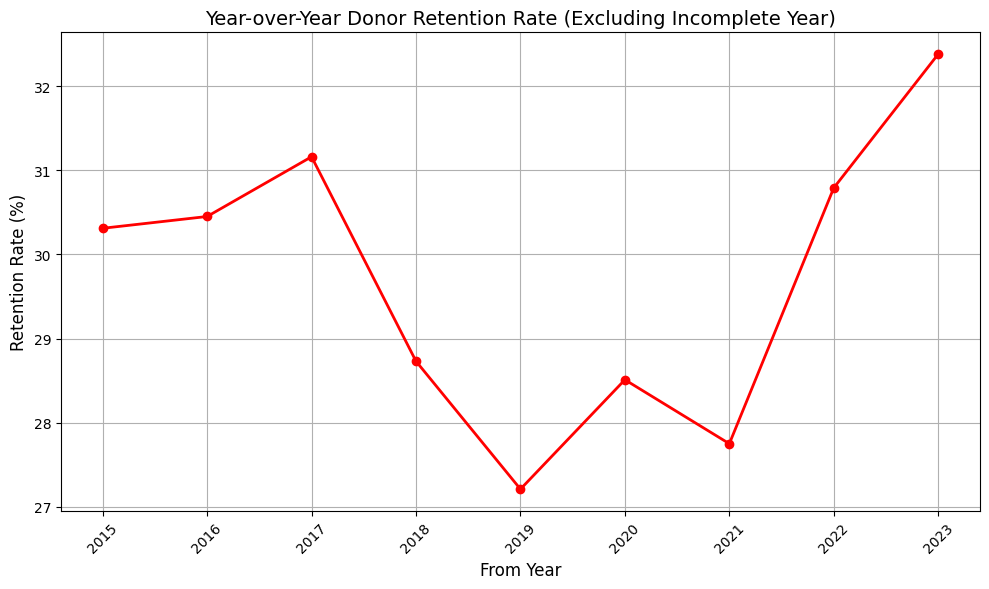

In [125]:
# conversion
df['DonationDate'] = pd.to_datetime(df['DonationDate'], dayfirst=True)

# Extract donation year
df['DonationYear'] = df['DonationDate'].dt.year
years = sorted(df['DonationYear'].unique())
retention_stats = []

for i in range(len(years) -1 ):
    year_current = years[i]
    year_next = years[i + 1]

    donors_current = set(df[df['DonationYear'] == year_current]['DonorID'])
    donors_next = set(df[df['DonationYear'] == year_next]['DonorID'])

    retained_donors = donors_current & donors_next
    retention_rate = len(retained_donors) / len(donors_current) * 100 if donors_current else 0

    retention_stats.append({
        "From Year": year_current,
        "To Year": year_next,
        "Donors in Year": len(donors_current),
        "Retained Donors": len(retained_donors),
        "Retention Rate (%)": round(retention_rate, 2)
    })

retention_df = pd.DataFrame(retention_stats)

# Exclude the last year from the plot as it has incomplete data
retention_df_plot = retention_df[:-1]

plt.figure(figsize=(10, 6))
plt.plot(retention_df_plot["From Year"].astype(str), retention_df_plot["Retention Rate (%)"], marker='o',  color = "red", linewidth=2)
plt.title("Year-over-Year Donor Retention Rate (Excluding Incomplete Year)", fontsize=14)
plt.xlabel("From Year", fontsize=12)
plt.ylabel("Retention Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Comment: This line graph illustrates the percentage of donors retained from one year to the next over a ten-year period. While retention fluctuates around 30%, occasional dips highlight the importance of targeted re-engagement strategies and sustained communication with donor segments.

Any NPO will want this information to position themselves regarding donor retention. By knowing how they retain donors, they can determine whether or not to foster interaction with donors, build more campaigns or any other inspired-data decision that could improve donor retention.


**What is the donation frequency per age range ?**

In [126]:
# Find out Maximum and Minimum age
print("the oldest person are ", df.Age.min())
print("the youngest person are ", df.Age.max())

the oldest person are  18
the youngest person are  79


/tmp/ipython-input-2493101412.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeRange', y='Amount', data=donation_by_age_range, palette='viridis')


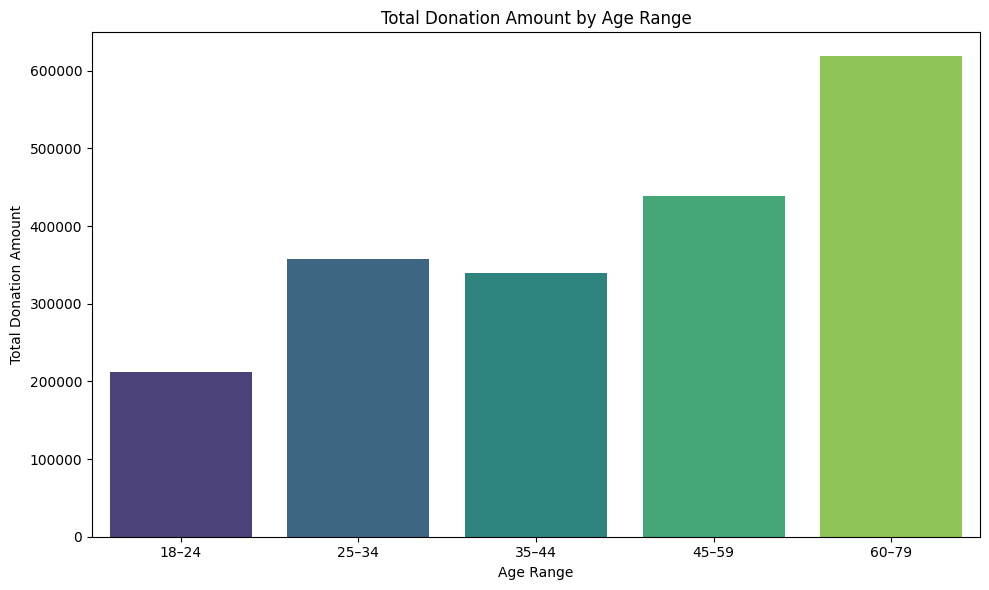

In [127]:
# Define age ranges

# Define bins and matching labels
bins = [18, 24, 35, 45, 59, 79]
labels = ['18–24', '25–34', '35–44', '45–59', '60–79']  # 5 labels for 5 intervals

# Create a new column with age ranges
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Calculate total donation amount per age range
donation_by_age_range = df.groupby('AgeRange', observed=True)['Amount'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeRange', y='Amount', data=donation_by_age_range, palette='viridis')

plt.title('Total Donation Amount by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Total Donation Amount')
plt.tight_layout()
plt.show()


Comment: Donors who are older are likely to donate more than young individuals in the range of 25 to 34 years old.
The results match [real world data](https://www.statista.com/statistics/292936/giving-to-charity-in-england-by-age/).

Any NPO would want this information to know which age range to target the most and which one to sensitize to donate more, whether it's through campaign messages or any other means.


**How many time donors are likely to donate ?**

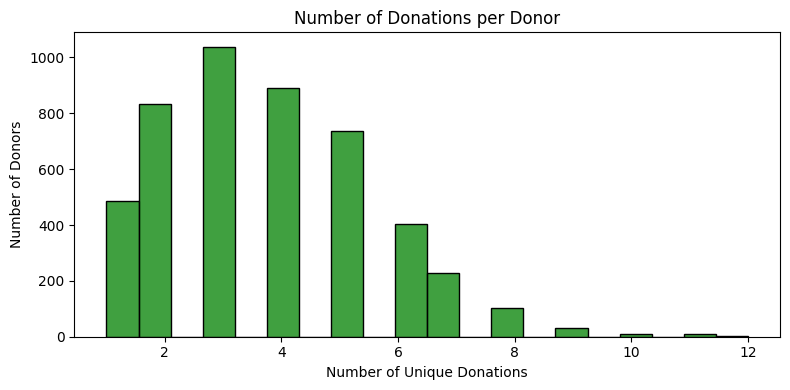

In [128]:
# import necessary library
import matplotlib.pyplot as plt
import seaborn as sns

# Group by DonorID to get donation count
donation_counts = donations.groupby('DonorID')['DonationID'].count()

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(donation_counts, bins=20, kde=False, color='green')
plt.title('Number of Donations per Donor')
plt.xlabel('Number of Unique Donations')
plt.ylabel('Number of Donors')
plt.tight_layout()
plt.show()

Comment: Most donors donates around 2 to 4 times.
We can observe that the Number of Donors decreases For higher number of donations, showing moderate donor retention.

This type of information is very useful because some NPOs might want to set their new objectives to higher number of donations per donor.




In [129]:
df.Age.value_counts()


,count
Age,
45,370
40,351
53,349
33,349
43,342
...,...
70,236
51,231
28,225


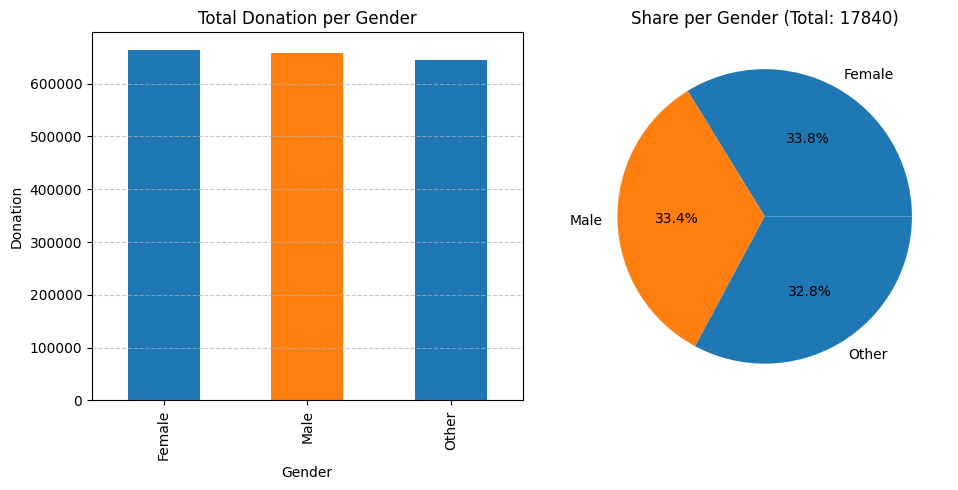

,Amount
Gender,
Female,663950.26
Male,657135.77
Other,645596.74


In [130]:
donation_by_gender = df.groupby('Gender')['Amount'].sum()

# Kalkile total donation tout ansanm
total_donation = df['Amount'].count()

# subplots (2 graf)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 1️ Bar chart  donation by gender
donation_by_gender.plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Total Donation per Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Donation')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2️ Pie chart
donation_by_gender.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], ylabel='', colors=['#1f77b4', '#ff7f0e'])
axes[1].set_title(f'Share per Gender (Total: {total_donation})')


plt.tight_layout()
plt.show()
donation_by_gender

Comment: For this fictitious data set, gender is equally distributed, but in some regions, NPOs might observe some imbalance and, therefore, make it their objective to understand why and do something about it.


**How can the different type of donors be classified ?**


In [131]:
import numpy as np

# Convert donation date to datetime
df['DonationDate'] = pd.to_datetime(df['DonationDate'])

# Create donor-level summary
today = pd.to_datetime('today')
donor_summary = df.groupby('DonorID').agg(
    FirstDonationDate=('DonationDate', 'min'),
    LastDonationDate=('DonationDate', 'max'),
    Frequency=('DonationID', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()
donor_summary['Recency'] = (today - donor_summary['LastDonationDate']).dt.days

# Merge with full donor list
donor_full_summary = pd.merge(donors[['DonorID']], donor_summary, on='DonorID', how='left')
donor_full_summary['Recency'] = donor_full_summary['Recency'].fillna(np.inf)
donor_full_summary['Frequency'] = donor_full_summary['Frequency'].fillna(0)
donor_full_summary['Monetary'] = donor_full_summary['Monetary'].fillna(0)
# Assign segments
def assign_segment(row):
    r = row['Recency']
    f = row['Frequency']
    m = row['Monetary']

    if np.isinf(r) or pd.isna(r):
        return 'Never Donated'
    elif r <= 365 and f == 1:
        return 'New Donors'
    elif r <= 365 and f >= 4 and m >= 750:
        return 'Champions'
    elif r <= 1095 and f >= 4:
        return 'Loyal Donors'
    elif r <= 1095 and 2 <= f <= 4 and m >= 750:
        return 'High Value Potentials'
    elif r > 1095 and f >= 2 and m >= 250:
        return 'Lapsed but Valuable'
    elif 365 < r <= 1095 and f >= 2:
        return 'At Risk'
    elif r > 1095 and f == 1:
        return 'Lost or Inactive'
    elif f <= 2 and m < 250:
        return 'Low Frequency'
    else:
        return 'Misc Donors'

donor_full_summary['Segment'] = donor_full_summary.apply(assign_segment, axis=1)

# Return segment summary for confirmation
segment_summary = donor_full_summary['Segment'].value_counts().reset_index()
segment_summary.columns = ['Segment', 'Count']
segment_summary

,Segment,Count
0,Loyal Donors,1658
1,Lapsed but Valuable,991
2,At Risk,685
3,Low Frequency,492
4,Misc Donors,395
5,Lost or Inactive,375
6,Champions,134
7,Never Donated,122
8,New Donors,20
9,High Value Potentials,19


/tmp/ipython-input-4202684907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Count', data=segment_summary, palette='viridis')


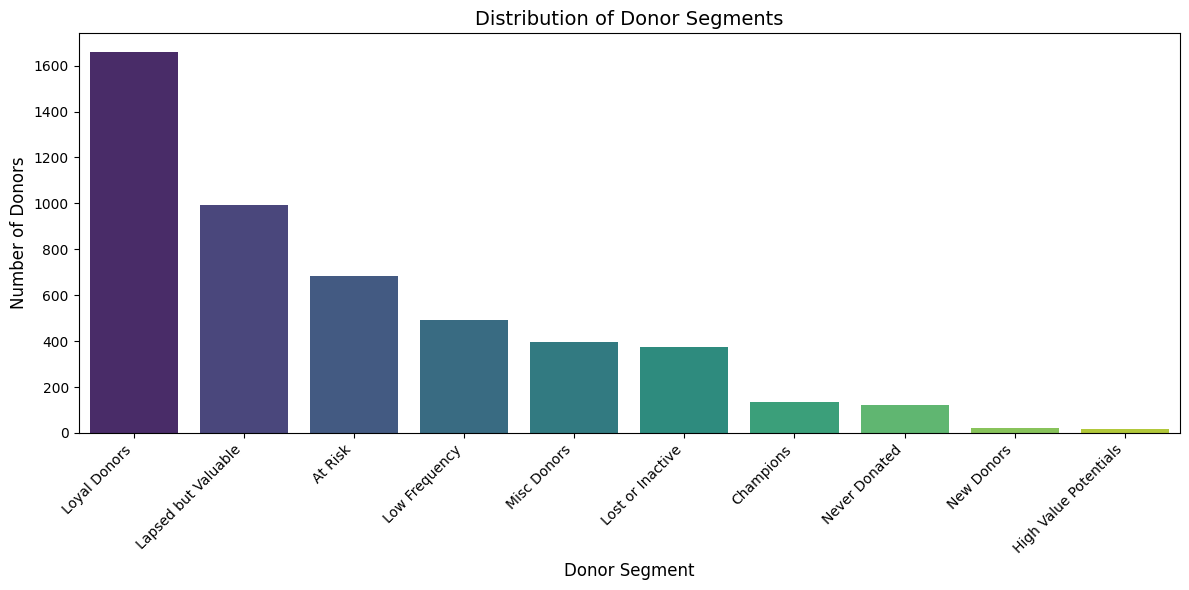

In [132]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Count', data=segment_summary, palette='viridis')
plt.title('Distribution of Donor Segments', fontsize=14)
plt.xlabel('Donor Segment', fontsize=12)
plt.ylabel('Number of Donors', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comments: Not every donor contributes the same. Therefore, donors have to be interacted with differently. Some donors may receive messages of recognition and heartfelt remerciements, while others may need to be re-engaged toward donating again. Knowing the different donor segments is crucial information for NPOs.



**what channel results to the best engagement outcome**?

In [133]:
df.EngagementOutcome.value_counts()

,count
EngagementOutcome,
Engaged,9723
Not Reached,2831
Unsubscribed,2688
Bounced,2598


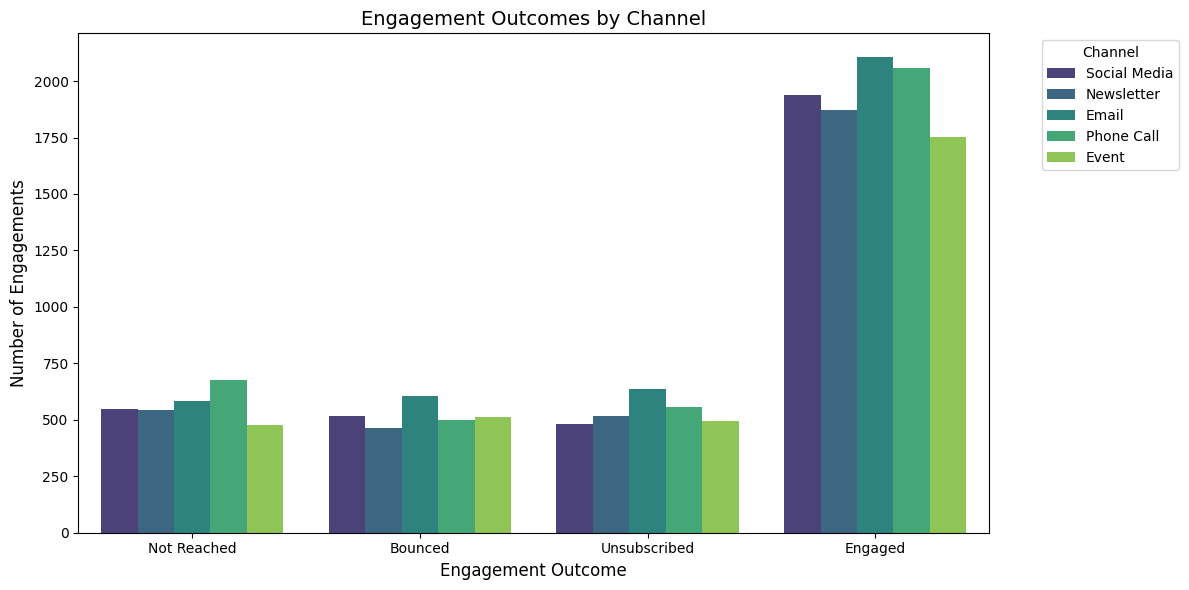

In [134]:
# Create a countplot showing outcomes across channels
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='EngagementOutcome', hue='Channel', palette='viridis')
plt.title('Engagement Outcomes by Channel', fontsize=14)
plt.xlabel('Engagement Outcome', fontsize=12)
plt.ylabel('Number of Engagements', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [135]:
df.Channel.value_counts()

,count
Channel,
Email,3931
Phone Call,3790
Social Media,3486
Newsletter,3398
Event,3235


Comment: Channels seem to have approximately the same engagement outcome in the context of this analysis.
However, some NPOs might have a certain channel that leads to better results. For example, in the context of Haiti, some NPOs may want to use social media instead of email, since it is more widely used.


In [136]:
df.head()

,DonorID,Age,Gender,Location,JoinDate,DonationID,DonationDate,Amount,CampaignID,CampaignName,TargetAmount,ActualAmount,Channel,Date,EngagementOutcome,ImpactType,Value,Cost,DonationYear,AgeRange
0,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,54063.32,62346.29,Social Media,2022-12-27,Not Reached,Workshops Delivered,31.0,100.0,2015,45–59
45,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT011160,2021-11-20,124.46,CAMP003,Youth Initiative 003,38582.41,33179.39,Social Media,2022-12-27,Not Reached,Workshops Delivered,19.0,100.0,2021,45–59
90,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT012124,2017-09-14,128.22,CAMP010,Youth Initiative 010,50455.82,54176.99,Social Media,2022-12-27,Not Reached,Workshops Delivered,40.0,100.0,2017,45–59
135,DNR00002,25,Male,ACT,2015-11-01 22:59:27.552825,DNT001904,2020-04-17,175.96,CAMP008,Youth Initiative 008,98200.79,102566.77,Newsletter,2023-09-09,Not Reached,Workshops Delivered,85.0,100.0,2020,25–34
150,DNR00002,25,Male,ACT,2015-11-01 22:59:27.552825,DNT011974,2017-01-19,35.31,CAMP006,Youth Initiative 006,33193.34,39159.84,Newsletter,2023-09-09,Not Reached,Workshops Delivered,25.0,100.0,2017,25–34


## Modeling

#### ==========================================================================================
**Feature Engineering**

Idea for modelisation:
what type of donors are most likely to stay loyal ?
feature: age, channel
comparaison of channel to engagement outcome

In [137]:
# Donor tenure (days between first join and latest donation)
df['DonorTenure'] = (df['DonationDate'] - df['JoinDate']).dt.days.abs()


In [138]:
# Campaign success ratio
df['CampaignSuccessRatio'] = df['ActualAmount'] / df['TargetAmount']
df

,DonorID,Age,Gender,Location,JoinDate,DonationID,DonationDate,Amount,CampaignID,CampaignName,...,Channel,Date,EngagementOutcome,ImpactType,Value,Cost,DonationYear,AgeRange,DonorTenure,CampaignSuccessRatio
0,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,...,Social Media,2022-12-27,Not Reached,Workshops Delivered,31.0,100.0,2015,45–59,1937,1.153209
45,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT011160,2021-11-20,124.46,CAMP003,Youth Initiative 003,...,Social Media,2022-12-27,Not Reached,Workshops Delivered,19.0,100.0,2021,45–59,412,0.859962
90,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT012124,2017-09-14,128.22,CAMP010,Youth Initiative 010,...,Social Media,2022-12-27,Not Reached,Workshops Delivered,40.0,100.0,2017,45–59,1116,1.073751
135,DNR00002,25,Male,ACT,2015-11-01 22:59:27.552825,DNT001904,2020-04-17,175.96,CAMP008,Youth Initiative 008,...,Newsletter,2023-09-09,Not Reached,Workshops Delivered,85.0,100.0,2020,25–34,1628,1.044460
150,DNR00002,25,Male,ACT,2015-11-01 22:59:27.552825,DNT011974,2017-01-19,35.31,CAMP006,Youth Initiative 006,...,Newsletter,2023-09-09,Not Reached,Workshops Delivered,25.0,100.0,2017,25–34,444,1.179750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439963,DNR04888,53,Other,QLD,2015-10-09 22:59:27.552825,DNT017601,2021-11-19,139.03,CAMP010,Youth Initiative 010,...,Phone Call,2023-08-21,Engaged,Workshops Delivered,40.0,100.0,2021,45–59,2232,1.073751
439983,DNR04889,30,Female,TAS,2019-10-27 22:59:27.552825,DNT010655,2025-01-01,31.40,CAMP004,Youth Initiative 004,...,Email,2023-07-09,Engaged,Workshops Delivered,27.0,100.0,2025,25–34,1892,1.139482
440003,DNR04889,30,Female,TAS,2019-10-27 22:59:27.552825,DNT015750,2017-07-11,93.17,CAMP010,Youth Initiative 010,...,Email,2023-07-09,Engaged,Workshops Delivered,40.0,100.0,2017,25–34,839,1.073751
440023,DNR04890,65,Female,ACT,2024-03-12 22:59:27.552825,DNT017336,2021-04-21,20.75,CAMP006,Youth Initiative 006,...,Social Media,2023-02-25,Engaged,Workshops Delivered,25.0,100.0,2021,60–79,1057,1.179750


In [139]:
dataset = df.groupby('DonorID').agg({
    'Age':'first',
    'Gender':'first',
    'Location':'first',
   'JoinDate':'first',
   'Amount':['sum','mean','count'],
   'Channel': lambda x: x.mode()[0],
    'EngagementOutcome': lambda x: x.mode()[0]
}).reset_index()
dataset.columns = ['DonorID','Age','Gender','Location','JoinDate','TotalAmount','AvgAmount','DonationCount','FavChannel','FavEngagementOutcome']

 #2. Créer les cibles
# ------------------------------
# Target 1: Donateur fidèle (1 si a fait un don dans les 12 derniers mois)
# target 2: Montant futur moyen d'un don (régression)
# Ici on simule
dataset['FutureDonation'] = np.random.randint(0,2,size=len(dataset))
dataset['FutureAmount'] = np.where(dataset['FutureDonation']==1,
                                   np.random.uniform(10,500,size=len(dataset)),
                                   0)


In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np


# Exemple de colonnes
features = ['Age','Gender','Location','TotalAmount','DonationCount','FavChannel','FavEngagementOutcome']
X = dataset[features]
y_class = dataset['FutureDonation']  # pour prédire si le donateur fera un futur don
y_reg = dataset['FutureAmount']      # pour prédire le montant

# Séparer train et test
X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42
)

# Préparation des colonnes
numeric_features = ['Age','TotalAmount','DonationCount']
categorical_features = ['Gender','Location','FavChannel']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# ----------------- Modèle Classification -----------------
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
clf_pipeline.fit(X_train, y_train_class)

y_pred_class = clf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Précision Classification (probabilité de don futur):", accuracy)

# ----------------- Modèle Régression -----------------
# On prédit le montant uniquement pour ceux qui feront un don
mask = y_train_reg > 0
reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
reg_pipeline.fit(X_train[mask], y_train_reg[mask])

# Tester sur les donateurs qui feront un don
mask_test = y_test_reg > 0
y_pred_reg = reg_pipeline.predict(X_test[mask_test])
rmse = np.sqrt(mean_squared_error(y_test_reg[mask_test], y_pred_reg))
print("RMSE Régression (montant futur):", rmse)


Précision Classification (probabilité de don futur): 0.5251572327044025
RMSE Régression (montant futur): 146.2967962081782


## Model Evaluation

In [141]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Prédictions sur le test set
y_pred_class = clf_pipeline.predict(X_test)
y_pred_proba = clf_pipeline.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Accuracy:", accuracy)

# ROC-AUC
roc_auc = roc_auc_score(y_test_class, y_pred_proba)
print("ROC-AUC:", roc_auc)

# Confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:\n", cm)


Accuracy: 0.5220125786163522
ROC-AUC: 0.5292217813051147
Confusion Matrix:
 [[248 202]
 [254 250]]


**Prédire la probabilité qu’un donateur fasse un futur don → classification binaire**

In [142]:
# Exemple de nouvelle donnée d'un donateur
new_donor = pd.DataFrame({
    'Age': [35],
    'Gender': ['Male'],
    'Location': ['QLD'],
    'TotalAmount': [250],
    'DonationCount': [10],
    'FavChannel': ['email']
})

# Prédiction probabilité de futur don
prob_don = clf_pipeline.predict_proba(new_donor)[:,1][0]
print(f"Probabilité de futur don: {prob_don:.2f}")

# Prédiction montant futur (même si le donateur ne donnera pas forcément, on peut prédire le montant)
future_amount = reg_pipeline.predict(new_donor)[0]
print(f"Montant futur attendu: {future_amount:.2f} €")


Probabilité de futur don: 0.56
Montant futur attendu: 186.02 €


## Recommendations
the use of data is important......

## Conclusion
the data reflects world data about NPO's even though fictitious it was a great way to showcase the importance of including data and builiding model in decision making for NPO's

## Contact information

Bellow: The Contact Information Of the Two Data scientist in charge of the project.

- First Name: Haender Michael

- Last Name : Jean Louis

- Email     : michaelhaenderjeanlouis@gmail.com

- Phone     : +509 41 75 0264

- LinkedIn  : https://www.linkedin.com/in/michael-haender-jean-louis-4b7320316?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app


- First Name  : John Widno
- Last Name   : DORCY
- Email       : dorcyjohnwidno97@gmail.com
- Phone       : +509 38 05 8388
- LinkedIn    : https://www.linkedin.com/in/john-widno-dorcy-19399a216/


For further inquiries, feedback, or collaboration on this analysis, feel free to reach out.